<a href="https://colab.research.google.com/github/jonhyuk0922/Tensorflow-Dev/blob/main/Course2_2_Augmentation_A_technique_to_avoid_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

##1. 라이브러리 호출 및 데이터 저장

###1-1. 라이브러리 호출

In [2]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

###1-2. 데이터 다운로드

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-05-12 12:43:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  75.4MB/s    in 0.9s    

2021-05-12 12:43:02 (75.4 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

###1-3. 디렉토리 지정

In [5]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = '/tmp/cats_and_dogs_filtered/train' #os.path.join(base_dir,'train')
validation_dir = '/tmp/cats_and_dogs_filtered/validation' #os.path.join(base_dir,'validation')

In [6]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

In [7]:
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

#2. 모델 정의 및 컴파일

##2-1. 모델 정의

In [22]:
model = tf.keras.models.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3),activation='relu',input_shape=(150,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512,activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

###2-2. 모델 컴파일

* 학습율 조정을 위해 RMSprop 옵티마이저 사용

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

#3. 이미지 제너레이터 생성

 * 우선 사용할 generator 인스턴스 생성해준다.
 * RGB 계수가 0~255 인데, 이건 학습하기에 부적합한 값이므로 rescale 해준다.

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

* 데이터는 위에서 지정한 train 디렉토리에서 가져온다.
* 모든 사이즈는 동일해야하므로 (150,150)으로 지정해준다.

In [11]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [12]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


#4. 모델 학습

In [13]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 41s - loss: 0.6885 - accuracy: 0.5370 - val_loss: 0.6660 - val_accuracy: 0.6050
Epoch 2/100
100/100 - 8s - loss: 0.6569 - accuracy: 0.6035 - val_loss: 0.6351 - val_accuracy: 0.6740
Epoch 3/100
100/100 - 8s - loss: 0.6098 - accuracy: 0.6770 - val_loss: 0.6074 - val_accuracy: 0.6680
Epoch 4/100
100/100 - 8s - loss: 0.5615 - accuracy: 0.7020 - val_loss: 0.6150 - val_accuracy: 0.6470
Epoch 5/100
100/100 - 8s - loss: 0.5408 - accuracy: 0.7240 - val_loss: 0.5604 - val_accuracy: 0.7150
Epoch 6/100
100/100 - 8s - loss: 0.5084 - accuracy: 0.7560 - val_loss: 0.5871 - val_accuracy: 0.6870
Epoch 7/100
100/100 - 8s - loss: 0.4875 - accuracy: 0.7595 - val_loss: 0.5571 - val_accuracy: 0.7310
Epoch 8/100
100/100 - 8s - loss: 0.4600 - accuracy: 0.7890 - val_loss: 0.5356 - val_accuracy: 0.7260
Epoch 9/100
100/100 - 8s - loss: 0.4318 - accuracy: 0.8015 - val_loss: 0.5512 - val_accuracy: 0.7250
Epoch 10/100
100/100 - 8s - loss: 0.4125 - accuracy: 0.8015 - val_loss: 0.5221 - val_accur

#5. 결과값 시각화

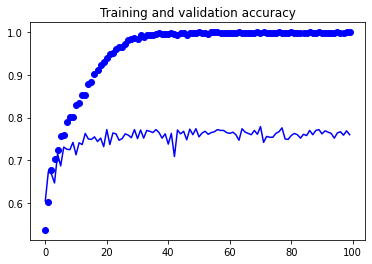

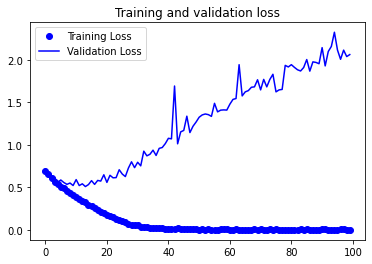

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

 * 전형적인 오버피팅을 확인할 수 있다. trian accuracy는 1에 가까워지고있지만 validation accuracy는 70~80% 에 머물러 있다.
 * 오버피팅을 벗어나기 위해 학습데이터를 늘려볼건데, 이번에 사용할 방법은 Augmentation(증강)이다.

#Augmentation(증강)
* 오버피팅을 피하기 위해 메모리 상에서 데이터 셋을 증강시켜주는 것 (회전, 반전 , 너비조절 등) 


https://keras.io/api/preprocessing/image/

-> 위 사이트에서 ImageDataGenerator class를 검색해보자.

#6. ImageGenerator + Augmentation

In [19]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
    )
test_datagen = ImageDataGenerator(
    rescale=1./255
    )

* 위로 올라가서 2. 모델 정의 및 컴파일 다시하고 내려와야함 **

#7. 증강 후 모델 재학습 및 시각화

In [24]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/100
100/100 - 9s - loss: 0.6883 - accuracy: 0.5505 - val_loss: 0.6741 - val_accuracy: 0.6290
Epoch 2/100
100/100 - 8s - loss: 0.6646 - accuracy: 0.6065 - val_loss: 0.6402 - val_accuracy: 0.6470
Epoch 3/100
100/100 - 8s - loss: 0.6145 - accuracy: 0.6755 - val_loss: 0.6688 - val_accuracy: 0.5940
Epoch 4/100
100/100 - 8s - loss: 0.5716 - accuracy: 0.7060 - val_loss: 0.5787 - val_accuracy: 0.7090
Epoch 5/100
100/100 - 8s - loss: 0.5298 - accuracy: 0.7405 - val_loss: 0.6399 - val_accuracy: 0.6640
Epoch 6/100
100/100 - 8s - loss: 0.4990 - accuracy: 0.7565 - val_loss: 0.5612 - val_accuracy: 0.7190
Epoch 7/100
100/100 - 8s - loss: 0.4739 - accuracy: 0.7775 - val_loss: 0.5597 - val_accuracy: 0.7080
Epoch 8/100
100/100 - 8s - loss: 0.4492 - accuracy: 0.7940 - val_loss: 0.5698 - val_accuracy: 0.7160
Epoch 9/100
100/100 - 8s - loss: 0.4242 - accuracy: 0.8045 - val_loss: 0.5311 - val_accuracy: 0.7300
Epoch 10/100
100/100 - 8s - loss: 0.3986 - accuracy: 0.8230 - val_loss: 0.5748 - val_accura

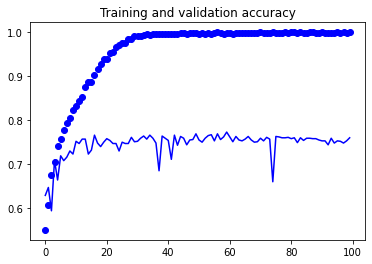

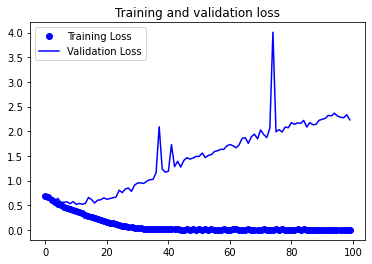

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

* 튀는 점을 제외하면 전체적으로 loss가 줄었음을 알 수 있다.